6/6 [==============================] - 0s 583us/step
Mean Training Accuracy:  [0.5884422  0.59723618 0.63919598 0.66984925 0.71105527 0.73165829
 0.77286433 0.80427136 0.82839195 0.8454774  0.86306533 0.87211055
 0.88316582 0.89572865 0.90050251 0.90527638 0.91030151 0.9138191
 0.91909547 0.92261307 0.92914572 0.92763819 0.9298995  0.93316584
 0.93517588 0.93743719 0.93969851 0.94070352 0.9414573  0.94472362
 0.94371859 0.94673367 0.94798995 0.94723618 0.94798994 0.94924623
 0.94949749 0.95175879 0.95226131 0.95150753 0.95301508 0.9522613
 0.95326633 0.95351759 0.95552764 0.95703517 0.95678392 0.95678393
 0.95778894 0.95954773 0.96055276 0.95929648 0.96005025 0.96155779
 0.96281406 0.96256281 0.96231156 0.96105527 0.96407035 0.96457287
 0.96582915 0.96482412 0.96582915 0.96407036 0.96633165 0.96683417
 0.9660804  0.96683416 0.96809044 0.96859296 0.96909547 0.96834171
 0.96909547 0.96909547 0.96809044 0.96934672 0.97035176 0.96984925
 0.97060301 0.97060301 0.97085426 0.97060301 0.970603

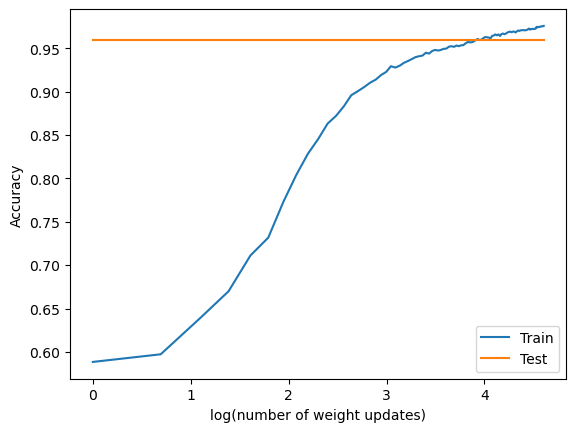

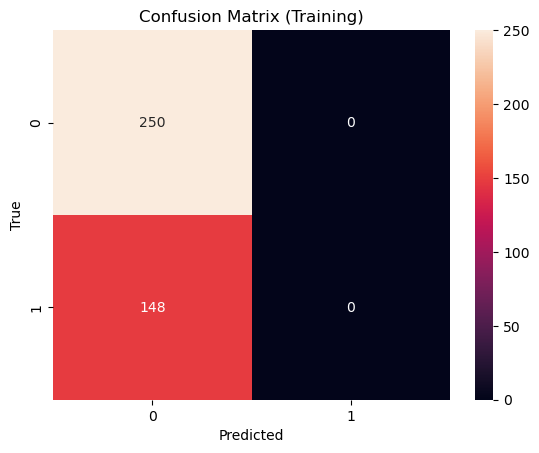

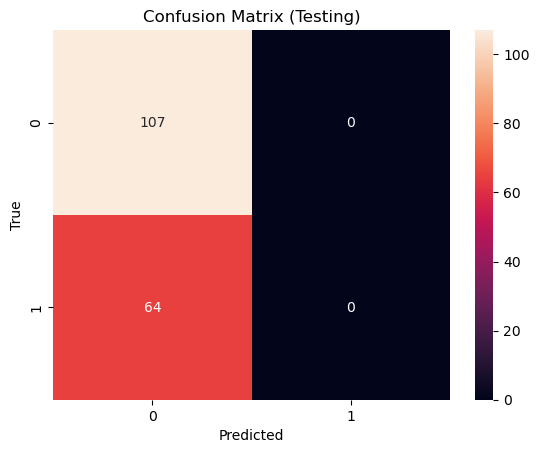

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

y = np.where(y == "M", 1, 0)

results_train = []
results_test = []
conf_mat_train = []
conf_mat_test = []
weights_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=i)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(60, input_dim=X_train.shape[1], activation="sigmoid"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    weights = model.get_weights()
    weights_list.append(weights)
    results_train.append(history.history["accuracy"])
    results_test.append(model.evaluate(X_test, y_test, verbose=0)[1])
    conf_mat_train.append(confusion_matrix(y_train, np.argmax(model.predict(X_train), axis=1)))
    conf_mat_test.append(confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1)))

results_train = np.mean(results_train, axis=0)
results_test = np.mean(results_test, axis=0)

print("Mean Training Accuracy: ", results_train)
print("Mean Testing Accuracy: ", results_test)

plt.plot(np.log(range(1, 101)), results_train, label="Train")
plt.plot(np.log(range(1, 101)), [results_test] * 100, label="Test")
plt.xlabel("log(number of weight updates)")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Accuracy.png")
plt.show()

conf_mat_train = np.mean(conf_mat_train, axis=0)
conf_mat_test = np.mean(conf_mat_test, axis=0)


plt.figure()
sns.heatmap(conf_mat_train, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Training)")
#plt.show()
plt.savefig("CM_Train.png")

plt.figure()
sns.heatmap(conf_mat_test, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Testing)")
plt.savefig("CM_Test.png")
#plt.show()

file = open('weights.txt', 'w')
file.write(str(weights_list))
file.close()